In [10]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

### Predict the S&P500 - Linear Regression

In [73]:
# Load the data 
df_merged_quandl = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_quandl.csv") # open the dataframe
df_merged_quandl = pd.DataFrame(df_merged_quandl[['Date','S&P 500']])
df_merged_quandl['Date'] = pd.to_datetime(df_merged_quandl['Date']) # putting back the day so we have beginning of the month everywhere

#Set the date as index
df_merged_quandl = df_merged_quandl.set_index(pd.DatetimeIndex(df_merged_quandl['Date'].values))
df_merged_quandl

,Date,S&P 500
1871-01-01,1871-01-01,105.76
1871-02-01,1871-02-01,104.02
1871-03-01,1871-03-01,105.01
1871-04-01,1871-04-01,112.01
1871-05-01,1871-05-01,117.56
...,...,...
2022-09-01,2022-09-01,3850.52
2022-09-01,2022-09-01,3585.62
2022-10-01,2022-10-01,3726.05
2022-10-01,2022-10-01,3871.98


In [42]:
# Plot the linear regression line and the close price
df_2 = df_merged_quandl.copy()

#Create a new column called 'Numbers' that ranges from 0 to the length of the data set
df_2['Numbers'] = list(range (0, len(df_2)))

#Store the 'Numbers' column into a variable called 'X' as an array
X = np.array(df_2[['Numbers']])

#Store the close price as an array in a variable called 'Y'
y = df_2['S&P 500'].values

#Create and train the model 
lin_model = LinearRegression().fit(X,y)
print('Intercept:', lin_model.intercept_)
print('Slope:', lin_model.coef_)

Intercept: -451.2762337202678
Slope: [1.29634017]


C:\Users\rapha\AppData\Local\Temp\ipykernel_11176\1284024183.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



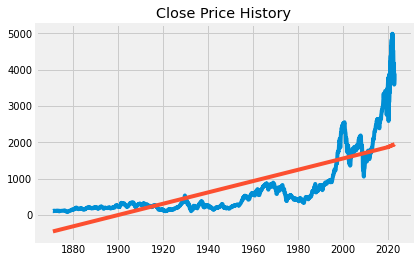

In [69]:
#Prepare the data for visualization 
# Get the predicted prcies from the model and store them into a variable called 'y_pred'

y_pred = lin_model.coef_ * X + lin_model.intercept_ #y - mx + b

#Store the predicted value in a new value called 'Pred'
df_2['Pred'] = y_pred 

#Plot the data

import plotly.express as px
fig = plt.figure()
plt.plot(df_2.index, df_2['S&P 500'])
plt.plot(df_2.index, df_2['Pred'])
plt.title("Close Price History")

fig.show();

In [71]:
#How good is the model ? 

r2_score(df_2['S&P 500'], df_2['Pred'])

0.5588844098310495

In [72]:
# Show the possbile price for the next day based on the model
lin_model.coef_ * len(df_2) +1 + lin_model.intercept_

# price for tomorrow should be 1947...

array([1947.953082])

### Predict the S&P500 - Linear Regression starting in 1980

In [81]:
df_merged_quandl = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_quandl.csv") # open the dataframe
df_merged_quandl = pd.DataFrame(df_merged_quandl[['Date','S&P 500']])
df_merged_quandl.loc[df_merged_quandl['Date'] == '1980-01-01']

,Date,S&P 500
1308,1980-01-01,423.08


In [82]:
df_merged_quandl = df_merged_quandl[1308:]
df_merged_quandl

,Date,S&P 500
1308,1980-01-01,423.08
1309,1980-02-01,433.74
1310,1980-03-01,387.96
1311,1980-04-01,377.42
1312,1980-05-01,390.79
...,...,...
1845,2022-09-01,3850.52
1846,2022-09-01,3585.62
1847,2022-10-01,3726.05
1848,2022-10-01,3871.98


In [83]:
#Set the date as index
df_merged_quandl = df_merged_quandl.set_index(pd.DatetimeIndex(df_merged_quandl['Date'].values))
df_merged_quandl

# Plot the linear regression line and the close price
df_2 = df_merged_quandl.copy()

#Create a new column called 'Numbers' that ranges from 0 to the length of the data set
df_2['Numbers'] = list(range (0, len(df_2)))

#Store the 'Numbers' column into a variable called 'X' as an array
X = np.array(df_2[['Numbers']])

#Store the close price as an array in a variable called 'Y'
y = df_2['S&P 500'].values

#Create and train the model 
lin_model = LinearRegression().fit(X,y)
print('Intercept:', lin_model.intercept_)
print('Slope:', lin_model.coef_)

Intercept: 38.82163319809956
Slope: [6.51266334]


C:\Users\rapha\AppData\Local\Temp\ipykernel_11176\1284024183.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



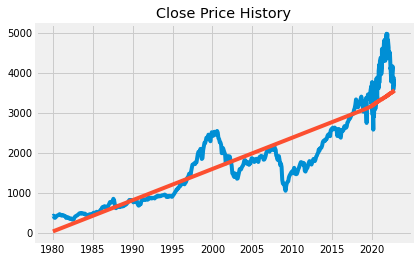

In [84]:
#Prepare the data for visualization 
# Get the predicted prcies from the model and store them into a variable called 'y_pred'

y_pred = lin_model.coef_ * X + lin_model.intercept_ #y - mx + b

#Store the predicted value in a new value called 'Pred'
df_2['Pred'] = y_pred 

#Plot the data

import plotly.express as px
fig = plt.figure()
plt.plot(df_2.index, df_2['S&P 500'])
plt.plot(df_2.index, df_2['Pred'])
plt.title("Close Price History")

fig.show();

In [85]:
#How good is the model ? 

r2_score(df_2['S&P 500'], df_2['Pred'])

0.8189492352272962

In [86]:
# Show the possbile price for the next day based on the model
lin_model.coef_ * len(df_2) +1 + lin_model.intercept_

# price for tomorrow should be 3569...

array([3569.68516298])

### Predict the S&P500 - Linear Regression starting in 2000

In [88]:
df_merged_quandl = pd.read_csv(r".\cleaned_data\02. Quandl\df_merged_quandl.csv") # open the dataframe
df_merged_quandl = pd.DataFrame(df_merged_quandl[['Date','S&P 500']])
df_merged_quandl.loc[df_merged_quandl['Date'] == '2000-01-01']

,Date,S&P 500
1548,2000-01-01,2506.67


In [89]:
df_merged_quandl = df_merged_quandl[1548:]
df_merged_quandl

,Date,S&P 500
1548,2000-01-01,2506.67
1549,2000-02-01,2427.73
1550,2000-03-01,2500.35
1551,2000-04-01,2532.07
1552,2000-05-01,2454.91
...,...,...
1845,2022-09-01,3850.52
1846,2022-09-01,3585.62
1847,2022-10-01,3726.05
1848,2022-10-01,3871.98


In [90]:
#Set the date as index
df_merged_quandl = df_merged_quandl.set_index(pd.DatetimeIndex(df_merged_quandl['Date'].values))
df_merged_quandl

# Plot the linear regression line and the close price
df_2 = df_merged_quandl.copy()

#Create a new column called 'Numbers' that ranges from 0 to the length of the data set
df_2['Numbers'] = list(range (0, len(df_2)))

#Store the 'Numbers' column into a variable called 'X' as an array
X = np.array(df_2[['Numbers']])

#Store the close price as an array in a variable called 'Y'
y = df_2['S&P 500'].values

#Create and train the model 
lin_model = LinearRegression().fit(X,y)
print('Intercept:', lin_model.intercept_)
print('Slope:', lin_model.coef_)

Intercept: 1170.3062500819617
Slope: [8.9220944]


C:\Users\rapha\AppData\Local\Temp\ipykernel_11176\1284024183.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



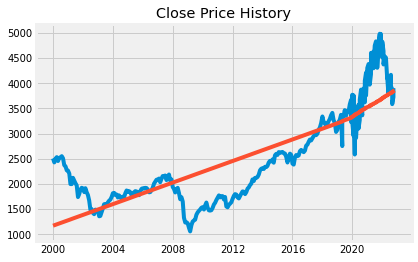

In [91]:
#Prepare the data for visualization 
# Get the predicted prcies from the model and store them into a variable called 'y_pred'

y_pred = lin_model.coef_ * X + lin_model.intercept_ #y - mx + b

#Store the predicted value in a new value called 'Pred'
df_2['Pred'] = y_pred 

#Plot the data

import plotly.express as px
fig = plt.figure()
plt.plot(df_2.index, df_2['S&P 500'])
plt.plot(df_2.index, df_2['Pred'])
plt.title("Close Price History")

fig.show();

In [92]:
#How good is the model ? 

r2_score(df_2['S&P 500'], df_2['Pred'])

0.6638045430809688

In [93]:
# Show the possbile price for the next day based on the model
lin_model.coef_ * len(df_2) +1 + lin_model.intercept_

# price for tomorrow should be 3569...

array([3865.77875822])